<a href="https://colab.research.google.com/github/andricmitrovic/ML-activity/blob/main/encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch import optim

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
torch.manual_seed(42)

In [5]:
input_output = torch.Tensor([[1, 0, 0, 0, 0, 0, 0, 0],
                             [0, 1, 0, 0, 0, 0, 0, 0],
                             [0, 0, 1, 0, 0, 0, 0, 0],
                             [0, 0, 0, 1, 0, 0, 0, 0],
                             [0, 0, 0, 0, 1, 0, 0, 0],
                             [0, 0, 0, 0, 0, 1, 0, 0],
                             [0, 0, 0, 0, 0, 0, 1, 0],
                             [0, 0, 0, 0, 0, 0, 0, 1]
                            ])

In [6]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.fc1 = nn.Linear(8, 3)
    self.fc2 = nn.Linear(3, 8)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self, input):
    output = self.fc1(input)
    output = self.sigmoid(output)
    output = self.fc2(output)
    output = self.sigmoid(output)
    return output

In [7]:
EPOCHS = 5000
LR = 0.01

In [8]:
model = Encoder()
optimizer = optim.Adam(model.parameters(), lr=LR)
criterion = nn.MSELoss()

In [9]:
loss_history = []

for epoch in range(EPOCHS):
  optimizer.zero_grad()
  out = model(input_output)
  loss = criterion(input_output, out)
  loss.backward()
  optimizer.step()

  loss_history.append(loss.item())

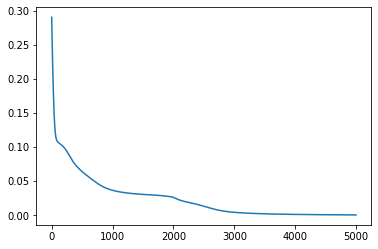

In [10]:
plt.plot(loss_history)

In [11]:
with torch.no_grad():
  s = torch.nn.Sigmoid()
  weights = model.fc2.weight
  weights = s(weights)
  weights = np.around(weights.numpy(), 0)
  print(weights)

  out = model(input_output)
  for yt, y in zip(input_output, out):
    yt = yt.numpy()
    y = np.around(y.numpy(), 0)
    print(yt, y)

[[1. 1. 0.]
 [1. 0. 1.]
 [0. 0. 1.]
 [1. 1. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 0.]]
[1. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0.] [0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1.] [0. 0. 0. 0. 0. 0. 0. 1.]
